<a href="https://colab.research.google.com/github/CarlosZaraza/Cibertec1/blob/main/Tarea_03_Carlos_Zaraza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 03

## 1. Cargar los datos en un dataframe y mostrar la forma y cabecera

In [ ]:
# TODO:
import pandas as pd
#Copiamos la ruta de nuestro archivo y cargamos usando la libreria pandas
df = pd.read_csv("/content/boston (1).csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Test
if df.iloc[255, 4] == 0.392 and df.iloc[53, 8] == 4.0:
    print("Felicitaciones, el código funciona correctamente!")
else:
    print("Intenta de nuevo, algo salió mal en una o ambas pruebas.")

Felicitaciones, el código funciona correctamente!


## 2. Eliminar la columna 'nox'

Recuerda que es una buena práctica mantener los nombres de las columnas con snake_case

In [ ]:
#Guardamos en la variable "df_filter" nuestra data con la columna NOX eliminada para no afectar nuestra data inicial
df_filter = df.drop("NOX", axis=1)
df_filter.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Test
if 'nox' not in df.columns and len(df.columns) == 13 and all(name.islower() for name in df.columns):
    print("Felicitaciones, el código funciona correctamente!")
else:
    print("Revisa de nuevo, uno o ambos criterios no se cumplen.")

Revisa de nuevo, uno o ambos criterios no se cumplen.


## 3. Ver las correlaciones entre variables usando un mapa de calor

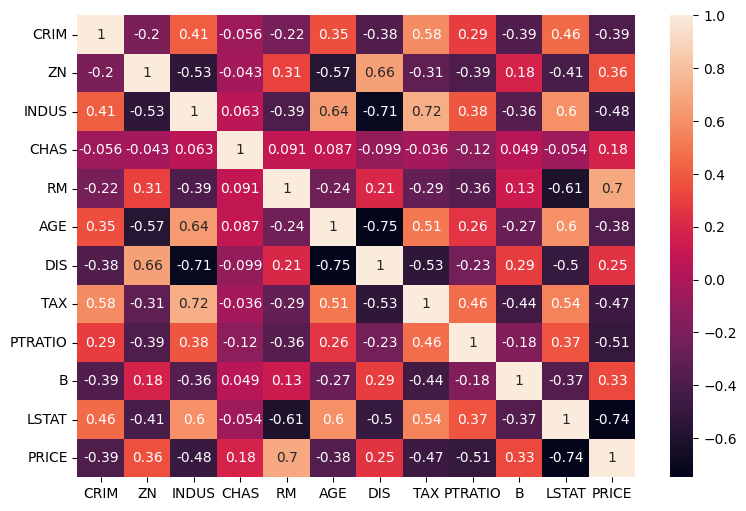

In [ ]:
# TODO:
import matplotlib.pyplot as plt #Para una mejor visualización de datos
import seaborn as sns    #Para correlacionar variables y verlas en un mapa de calor

#Elejimos el tamaño de nuestra figura
plt.figure(figsize=(9, 6))
#Elegimos las variables que queremos correlacionar para verlas en un HM
hm = sns.heatmap(df_filter[['CRIM','ZN','INDUS','CHAS','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT','PRICE']].corr(), annot=True)
plt.show()



## 4. Crear un scatterplot para las variables price y lstat ¿que se observa?

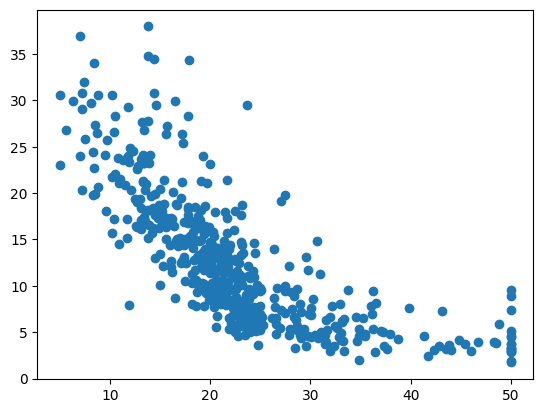

In [ ]:
# TODO:
#Graficamos un mapa de disperción entre la variable PRICE  y LSTAT de la data que filtramos
plt.scatter(df_filter['PRICE'], df_filter['LSTAT'])
plt.show()

## 5. Transformar lstat a escala logaritmica. Volver a hacer el scatterplot. ¿que observa?

Para transformar a escala logarítimica o conversiones similares, se puede utilizar NumPy como en el caso de los valores de los pixeles de la imagen vista en clase.

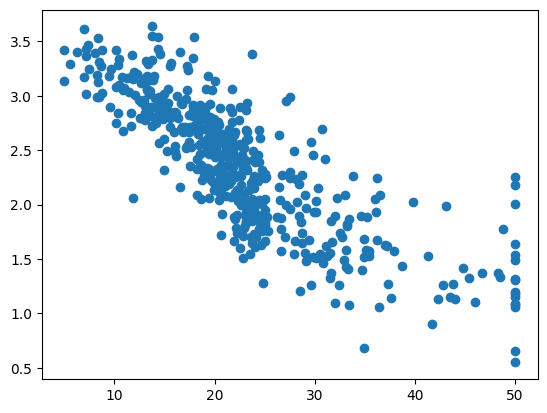

0      1.605430
1      2.212660
2      1.393766
3      1.078410
4      1.673351
         ...   
501    2.269028
502    2.206074
503    1.729884
504    1.868721
505    2.064328
Name: lstat_log, Length: 506, dtype: float64

In [ ]:
# TODO:
import numpy as np
# Transformar la columna 'LSTAT' a escala logarítmica
df_filter['lstat_log'] = np.log(df_filter['LSTAT'])

#Graficamos un mapa de disperción entre la variable PRICE  y LSTAT de la data que filtramos
plt.scatter(df_filter['PRICE'], df_filter['lstat_log'])
plt.show()
df_filter['lstat_log']

In [ ]:
# Test
if 'lstat_log' in df.columns and all(np.isclose(df_filter['lstat_log'], np.log(df_filter['lstat']))):
    print("Felicitaciones, el código funciona correctamente!")
else:
    print("Revisa de nuevo, parece que algo no está bien con la operación.")

Revisa de nuevo, parece que algo no está bien con la operación.


## 6. Separar los datos en train y test. Aplicar luego standardscaler a ambos x

In [ ]:
# TODO:
from sklearn.model_selection import train_test_split
#Lo primero es definir X y Y - variables dep e indp

#Eliminamos la variable dependiente de la database
X = df_filter.drop(['PRICE'], axis = 1).values

#Solo tomaremos los datos de la variable dependiente
y = df_filter['PRICE'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 1)

## 7. Usar linearregression para entrenar los datos. Mostrar el score

In [ ]:
# TODO:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Creamos el modelo Lasso
ml = LinearRegression()

#Entrenamos el modelo con los datos de entrenamiento
ml.fit(X_train, y_train)

#Realzamos predicciones en el conjunto de prueba
y_pred = ml.predict(X_val)

#Mostramos el R2 score
score = r2_score(y_val, y_pred)
print(f'R2 Score: {score}')

R2 Score: 0.8052242943886376


## 8. Usar **ridgeregression** para entrenar los datos. Usar alpha=10. Mostrar el score

In [ ]:
# TODO:
from sklearn.linear_model import Ridge

#Creamos el modelo Ridge
ml = Ridge(alpha=10)

#Entrenamos el modelo con los datos de entrenamiento
ml.fit(X_train, y_train)

#Realzamos predicciones en el conjunto de prueba
y_pred = ml.predict(X_val)

#Mostramos el R2 score y comparamos
score = r2_score(y_val, y_pred)
print(f'R2 Score (Ridge): {score}')

R2 Score: 0.8138805756208899


## 9. Usar **lassoregression** para entrenar los datos. Usar alpha=10. Mostrar el score

In [ ]:
# TODO:
from sklearn.linear_model import Lasso

#Creamos el modelo Lasso
ml = Lasso(alpha=10)

#Entrenamos el modelo con los datos de entrenamiento
ml.fit(X_train, y_train)

#Realzamos predicciones en el conjunto de prueba
y_pred = ml.predict(X_val)

#Mostramos el R2 score y comparamos
score = r2_score(y_val, y_pred)
print(f'R2 Score (Lasso): {score}')

R2 Score: 0.5095038853057026


## 10. Usar lassocv para entrenar los datos.

• Usar 0.0001,0.001,0.01,0.1,1,10 para alpha

• Mostrar el score

In [ ]:
# TODO:
from sklearn.linear_model import LassoCV

#Creamos el modelo LassoCV
ml = LassoCV(alphas=[0.0001,0.001,0.01,0.1,1,10], cv=6)

#Entrenamos el modelo con los datos de entrenamiento
ml.fit(X_train, y_train)

# Obtener el mejor valor de alpha seleccionado por la validación cruzada
best_alpha = ml.alpha_
print(f'Mejor valor de alpha: {best_alpha}')

#Realzamos predicciones en el conjunto de prueba
y_pred = ml.predict(X_val)

#Mostramos el R2 score y comparamos
score = r2_score(y_val, y_pred)
print(f'R2 Score (LassoCV): {score}')

Mejor valor de alpha: 0.0001
R2 Score (LassoCV): 0.8052326016770863


Conclusiones: El metodo de Ridge & Lasso pueden ayudar a mejorar la estabilidad del modelo cuando hay multicolinealidad entre las variables predictoras (correlación alta entre ellas)

En este caso se puede ver que el metodo de Ridge es más eficiente frente a nuestra base de datos, ya que reduce la sensibilidad a pequeñas variaciones en estos.